<a href="https://colab.research.google.com/github/mayur7garg/66DaysOfData/blob/main/Day%201/Affine_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

# Affine Transformations

Affine transformation in Euclidean geometry is a geometric transformation that can be applied to a set of points in N-dimensional space to transform them to a new set of points in the same N-dimensional space.

Some properties of Affine transformations include:
- Dimensions of affine subspaces are preserved i.e. points stay as points, lines as lines, planes as planes, etc.
- Straight lines stay straight after transformation.
- Any two parallel lines stay parallel even after the transformation.
- Angles and distances between lines or points may not be preserved.
- These transformation can be easily implemented using matrices.
- Matrix multiplication of multiple affine transformation matrices results in a matrix which also corresponds to an affine transformation.
- Affine transformations on images allows us to translate, rotate, scale or shear the image.

## Imports

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Load Image

In [3]:
img = cv2.imread('/content/Data/Images/A.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, ch = img.shape
rows, cols, ch

(963, 1200, 3)

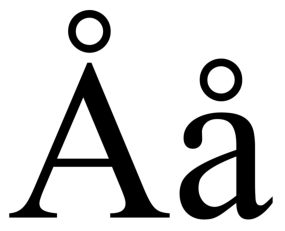

In [4]:
plt.axis(False)
plt.grid(False)
plt.imshow(img);

## Helper functions

### Display images

In [5]:
def display_input_output(input_img, output_img, title):
    '''Prints the image before and after transformation'''
    plt.subplots(1, 2)
    plt.suptitle(title, fontsize = 20)

    plt.subplot(1, 2, 1)
    plt.axis(False)
    plt.grid(False)
    plt.title('Input')
    plt.imshow(input_img);

    plt.subplot(1, 2, 2)
    plt.axis(False)
    plt.grid(False)
    plt.title('Output')
    plt.imshow(output_img);

### Get translation matrix

In [6]:
def get_translation_matrix(x, y):
    '''Gets a 2 x 3 matrix 
    that translates the image by x pixels in 1st dimension
    and by y pixels in 2nd dimension.'''
    matrix = [[1, 0, x], 
          [0, 1, y]]
    return np.float32(matrix)

### Get rotation matrix

In [7]:
def get_rotation_matrix(deg):
    '''Gets a 2 x 3 matrix that rotates the image by deg degrees clockwise.'''
    rad = np.deg2rad(deg)
    matrix = [[np.cos(rad), -np.sin(rad), 0], 
          [np.sin(rad), np.cos(rad), 0]]
    return np.float32(matrix)

### Get scaling matrix

In [8]:
def get_scaling_matrix(x, y):
    '''Gets a 2 x 3 matrix 
    that scales the image by x in 1st dimension
    and by y in 2nd dimension.'''
    matrix = [[x, 0, 0], 
          [0, y, 0]]
    return np.float32(matrix)

### Get shearing matrix

In [9]:
def get_shearing_matrix(x, y):
    '''Gets a 2 x 3 matrix 
    that shears the image by x in 1st dimension
    and by y in 2nd dimension.'''
    matrix = [[1, x, 0], 
          [y, 1, 0]]
    return np.float32(matrix)

## Identity Transformation
This is the base transformation. No change is observed in the image after identity transformation.

### Matrix

In [10]:
matrix = [[1, 0, 0], 
          [0, 1, 0]] 
matrix = np.float32(matrix)
matrix

array([[1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

### Transformation

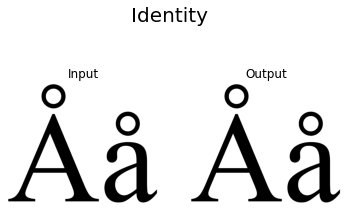

In [11]:
transformed_img = cv2.warpAffine(img, matrix, (cols, rows))
display_input_output(img, transformed_img, 'Identity')

## Translation
This transformation moves the image along the X and Y dimensions.

### Matrix

In [12]:
matrix = get_translation_matrix(200, -100)
matrix

array([[   1.,    0.,  200.],
       [   0.,    1., -100.]], dtype=float32)

### Transformation

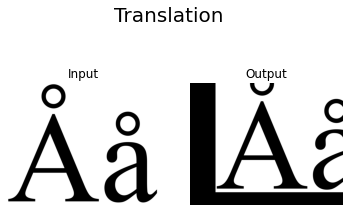

In [13]:
transformed_img = cv2.warpAffine(img, matrix, (cols, rows))
display_input_output(img, transformed_img, 'Translation')

## Rotation
This transformation rotates the image about (0, 0) by a specified degree in clockwise direction.

### Matrix

In [14]:
matrix = get_rotation_matrix(30)
matrix

array([[ 0.8660254, -0.5      ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ]], dtype=float32)

### Transformation

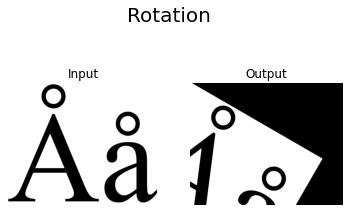

In [15]:
transformed_img = cv2.warpAffine(img, matrix, (cols, rows))
display_input_output(img, transformed_img, 'Rotation')

## Scaling
This transformation scales the image in the X and Y dimensions.

### Matrix

In [16]:
matrix = get_scaling_matrix(0.8, 0.6)
matrix

array([[0.8, 0. , 0. ],
       [0. , 0.6, 0. ]], dtype=float32)

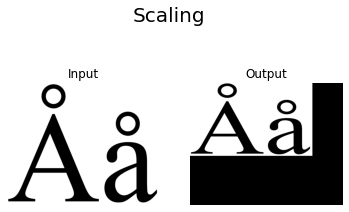

In [17]:
transformed_img = cv2.warpAffine(img, matrix, (cols, rows))
display_input_output(img, transformed_img, 'Scaling')

## Shearing
This transformation applies a shearing effect to the iage in the X and Y dimension.

### Matrix

In [18]:
matrix = get_shearing_matrix(0.1, 0.2)
matrix

array([[1. , 0.1, 0. ],
       [0.2, 1. , 0. ]], dtype=float32)

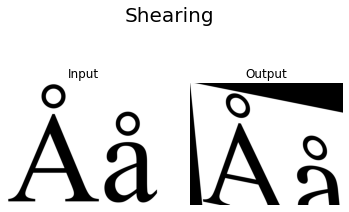

In [19]:
transformed_img = cv2.warpAffine(img, matrix, (cols, rows))
display_input_output(img, transformed_img, 'Shearing')

## Composite Transformations
Multiple transformations can be multiplied together to get a composite transformation. Since matrix multiplication is not commutative, the order of matrix multiplication determines the order of transformations applied to the image.

np.vstack is used here to convert the shape of matrices from 2 x 3 to 3 x 3 so that they have compatible dimensions for multiplications. Later, the first two rows are extracted back before applying the transformation.

### Example 1

In [20]:
matrix = np.vstack((get_translation_matrix(400, -300), [0, 0, 1]))
matrix = matrix @ np.vstack((get_rotation_matrix(45), [0, 0, 1]))
matrix = matrix[:2]
matrix

array([[   0.70710677,   -0.70710677,  400.        ],
       [   0.70710677,    0.70710677, -300.        ]])

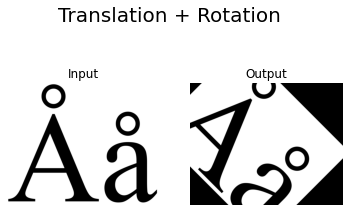

In [21]:
transformed_img = cv2.warpAffine(img, matrix, (cols, rows))
display_input_output(img, transformed_img, 'Translation + Rotation')

### Example 2

In [22]:
matrix = np.vstack((get_translation_matrix(500, 100), [0, 0, 1]))
matrix = matrix @ np.vstack((get_scaling_matrix(1.5, 0.5), [0, 0, 1]))
matrix = matrix @ np.vstack((get_rotation_matrix(60), [0, 0, 1]))
matrix = matrix[:2]
matrix

array([[ 7.50000000e-01, -1.29903808e+00,  5.00000000e+02],
       [ 4.33012694e-01,  2.50000000e-01,  1.00000000e+02]])

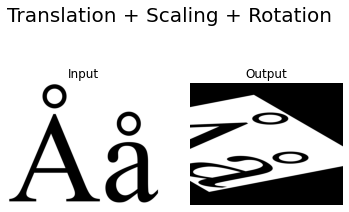

In [23]:
transformed_img = cv2.warpAffine(img, matrix, (cols, rows))
display_input_output(img, transformed_img, 'Translation + Scaling + Rotation')

### Example 3

In [24]:
matrix = np.vstack((get_scaling_matrix(0.9, 1.2), [0, 0, 1]))
matrix = matrix @ np.vstack((get_shearing_matrix(0.3, 0.05), [0, 0, 1]))
matrix = matrix @ np.vstack((get_translation_matrix(100, -100), [0, 0, 1]))
matrix = matrix[:2]
matrix

array([[ 8.99999976e-01,  2.70000004e-01,  6.29999973e+01],
       [ 6.00000033e-02,  1.20000005e+00, -1.14000004e+02]])

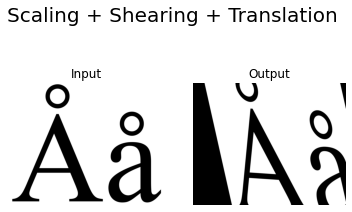

In [25]:
transformed_img = cv2.warpAffine(img, matrix, (cols, rows))
display_input_output(img, transformed_img, 'Scaling + Shearing + Translation')